In [1]:
import numpy as np
import glob
import gymnasium as gym
from gymnasium import spaces

from pynktrombonegymnasium.environment import PynkTrombone
from stable_baselines3.common.env_checker import check_env

/home/sandeepnmenon/miniconda/envs/rl_proj/lib/python3.10/site-packages/librosa/util/files.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_filename


In [2]:
target_sound_files = glob.glob("./data/sample_target_sounds/*.wav")
target_sound_files

['./data/sample_target_sounds/trachea_0-3.5.wav']

In [3]:
class DiscreteActions(gym.ActionWrapper):
    def __init__(self, env, disc_to_cont):
        super().__init__(env)
        self.disc_to_cont = disc_to_cont
        self.action_space = spaces.Discrete(len(disc_to_cont))

    def action(self, act):
        return self.disc_to_cont[act]
    
env = gym.make("LunarLanderContinuous-v2")
print(env.action_space)
wrapped_env = DiscreteActions(env, [np.array([1,0]), np.array([-1,0]),
                                        np.array([0,1]), np.array([0,-1])])
print(wrapped_env.action_space)         #Discrete(4)


Box(-1.0, 1.0, (2,), float32)
Discrete(4)


In [4]:
from pynktrombonegymnasium.spaces import ActionSpaceNames as ASN
class ActionWrapper(gym.ActionWrapper):
    def _init_(self, env):
        super().__init__(env)
        
    def action(self, action):
        mapped_actions = {}
        if isinstance(action, dict):
            mapped_actions = action
        elif isinstance(action, (np.ndarray,list)):
            for i, key in enumerate(sorted(self.dict_action_space.spaces.keys())):
                mapped_actions[key] = action[i]
        else:
            raise ValueError(f"Unexpected action type: {type(action)}")
        
        return {
            ASN.PITCH_SHIFT: mapped_actions[ASN.PITCH_SHIFT],
            ASN.TENSENESS: (mapped_actions[ASN.TENSENESS] + 1) * 0.5,
            ASN.TRACHEA: (mapped_actions[ASN.TRACHEA] + 1) * 1.75,
            ASN.EPIGLOTTIS: (mapped_actions[ASN.EPIGLOTTIS] + 1) * 1.75,
            ASN.VELUM: (mapped_actions[ASN.VELUM] + 1)* 1.75,
            ASN.TONGUE_INDEX: (mapped_actions[ASN.TONGUE_INDEX]+1)*28+12,
            ASN.TONGUE_DIAMETER: (mapped_actions[ASN.TONGUE_DIAMETER]+1)*1.75,
            ASN.LIPS: (mapped_actions[ASN.LIPS]+1)*0.75
        }
                
    
    
def make_env(target_sound_files):
    env = PynkTrombone(target_sound_files)
    env2 = ActionWrapper(env)
    return env2

Box(-1.0, 1.0, (8,), float32)

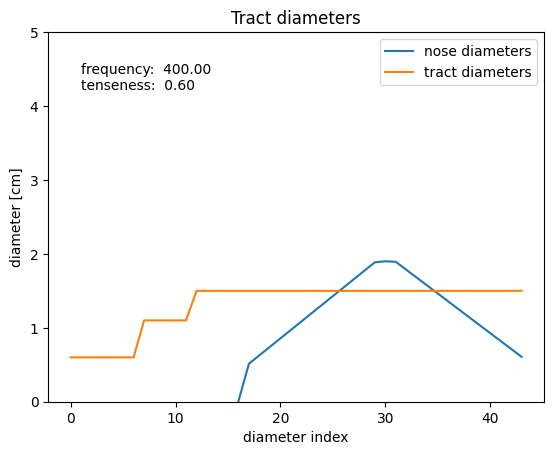

In [5]:
env = make_env(target_sound_files=target_sound_files)

env.action_space

We detected your env to be a GoalEnv because `env.compute_reward()` was defined.
If it's not the case, please rename `env.compute_reward()` to something else to avoid False positives.
[ActionWrapper] action:  [ 0.93150705  0.04526639 -0.5642737  -0.340351    0.96656024 -0.72675675
 -0.38775137  0.949185  ]
[ActionWrapper] action mapped:  [ 0.93150705  0.04526639 -0.5642737  -0.340351    0.96656024 -0.72675675
 -0.38775137  0.949185  ]
[ActionWrapper] pitch shift:  -0.5642737
action:  {'pitch_shift': -0.5642737, 'tenseness': 0.3298245072364807, 'trachea': 1.0714351013302803, 'epiglottis': 3.380137339234352, 'velum': 3.41107377409935, 'tongue_index': 19.650810956954956, 'tongue_diameter': 3.441480427980423, 'lips': 0.783949795179069}
action mapped:  {'pitch_shift': -0.5642737, 'tenseness': 0.3298245072364807, 'trachea': 1.0714351013302803, 'epiglottis': 3.380137339234352, 'velum': 3.41107377409935, 'tongue_index': 19.650810956954956, 'tongue_diameter': 3.441480427980423, 'lips': 0.783949

/home/sandeepnmenon/miniconda/envs/rl_proj/lib/python3.10/site-packages/stable_baselines3/common/env_checker.py:263: UserWarning: Your observation achieved_goal has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(
/home/sandeepnmenon/miniconda/envs/rl_proj/lib/python3.10/site-packages/stable_baselines3/common/env_checker.py:263: UserWarning: Your observation desired_goal has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(
/home/sandeepnmenon/miniconda/envs/rl_proj/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.dict_action_space to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.dict_act

[ActionWrapper] action:  [ 0.22836976 -0.47879955 -0.7880828  -0.69825107  0.471893    0.21827807
 -0.7843496  -0.7710591 ]
[ActionWrapper] action mapped:  [ 0.22836976 -0.47879955 -0.7880828  -0.69825107  0.471893    0.21827807
 -0.7843496  -0.7710591 ]
[ActionWrapper] pitch shift:  -0.7880828
action:  {'pitch_shift': -0.7880828, 'tenseness': 0.15087446570396423, 'trachea': 0.3773881644010544, 'epiglottis': 2.1496470756828785, 'velum': 0.4006465822458267, 'tongue_index': 46.11178582906723, 'tongue_diameter': 2.5758127719163895, 'lips': 0.3909003362059593}
action mapped:  {'pitch_shift': -0.7880828, 'tenseness': 0.15087446570396423, 'trachea': 0.3773881644010544, 'epiglottis': 2.1496470756828785, 'velum': 0.4006465822458267, 'tongue_index': 46.11178582906723, 'tongue_diameter': 2.5758127719163895, 'lips': 0.3909003362059593}
[ActionWrapper] action:  [ 0.3814973  -0.080194   -0.3195281  -0.89280105  0.716143    0.7491512
  0.3453746  -0.1412507 ]
[ActionWrapper] action mapped:  [ 0.3814

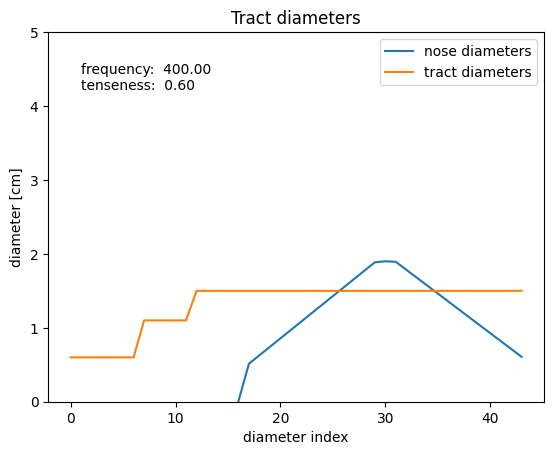

In [6]:
env = make_env(target_sound_files=target_sound_files)
check_env(env, warn=True)

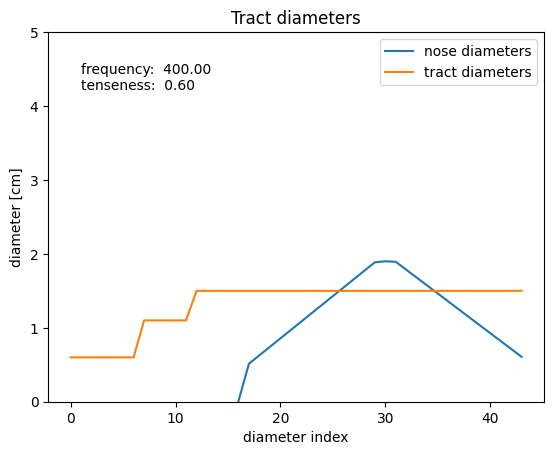

In [10]:
from stable_baselines3 import PPO, A2C, DQN
from stable_baselines3.common.env_util import make_vec_env
from functools import partial

# Instantiate the env
env_callable = partial(make_env, target_sound_files=target_sound_files)

vec_env = make_vec_env(env_callable, n_envs=1, env_kwargs=dict(target_sound_files=target_sound_files))

In [11]:
from stable_baselines3.common.type_aliases import Schedule

def linear_schedule(initial_value: float) -> Schedule:
    """
    Linear learning rate schedule.

    :param initial_value: Initial learning rate.
    :return: schedule that computes
      current learning rate depending on remaining progress
    """
    def func(progress_remaining: float) -> float:
        """
        Progress will decrease from 1 (beginning) to 0.

        :param progress_remaining:
        :return: current learning rate
        """
        return progress_remaining * initial_value

    return func

In [12]:
from sb3_plus import MultiOutputPPO
model = MultiOutputPPO(
    policy='MultiInputPolicy',
    env=env,
    learning_rate = linear_schedule(initial_value=2e-2),
    batch_size=256,
    verbose=1,
    policy_kwargs=dict(
        net_arch=dict(pi=[252] * 4, vf=[252] * 4)
    ),
    tensorboard_log="./logs/mimo_pynktrombone_tensorboard/"
)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [13]:
model.learn(
    total_timesteps=int(10000),
    progress_bar=True,
    tb_log_name="mi_ppo_pynk",
)


Logging to ./logs/mimo_pynktrombone_tensorboard/mi_ppo_pynk_1


Output()

/home/sandeepnmenon/miniconda/envs/rl_proj/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: 
env.dict_action_space to get variables from other wrappers is deprecated and will be removed in v1.0, to get this 
variable you can do `env.unwrapped.dict_action_space` for environment variables or 
`env.get_wrapper_attr('dict_action_space')` that will search the reminding wrappers.
  logger.warn(

----------------------------------
| rollout/           |           |
|    ep_len_mean     | 216       |
|    ep_rew_mean     | -2.03e+03 |
| time/              |           |
|    fps             | 71        |
|    iterations      | 1         |
|    time_elapsed    | 28        |
|    total_timesteps | 2048      |
----------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 216       |
|    ep_rew_mean          | -1.49e+03 |
| time/                   |           |
|    fps                  | 75        |
|    iterations           | 2         |
|    time_elapsed         | 54        |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 134.51328 |
|    clip_fraction        | 0.934     |
|    clip_range           | 0.2       |
|    entropy_loss         | -11.9     |
|    explained_variance   | 0.000282  |
|    learning_rate        | 0.0159    |
|    loss                 | 1.44e+03  |
|    n_updates            | 10        |
|    policy_gradient_loss | 0.25      |
|    std                  | 1.11      |
|    value_loss           | 5.79e+03  |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 216       |
|    ep_rew_mean          | -1.29e+03 |
| time/                   |           |
|    fps                  | 76        |
|    iterations           | 3         |
|    time_elapsed         | 80        |
|    total_timesteps      | 6144      |
| train/                  |           |
|    approx_kl            | 457.9511  |
|    clip_fraction        | 0.985     |
|    clip_range           | 0.2       |
|    entropy_loss         | -12.3     |
|    explained_variance   | 0         |
|    learning_rate        | 0.0118    |
|    loss                 | 1.05e+03  |
|    n_updates            | 20        |
|    policy_gradient_loss | 0.271     |
|    std                  | 1.14      |
|    value_loss           | 1.88e+03  |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 216       |
|    ep_rew_mean          | -1.2e+03  |
| time/                   |           |
|    fps                  | 77        |
|    iterations           | 4         |
|    time_elapsed         | 105       |
|    total_timesteps      | 8192      |
| train/                  |           |
|    approx_kl            | 361.44952 |
|    clip_fraction        | 0.985     |
|    clip_range           | 0.2       |
|    entropy_loss         | -12.5     |
|    explained_variance   | 0         |
|    learning_rate        | 0.00771   |
|    loss                 | 976       |
|    n_updates            | 30        |
|    policy_gradient_loss | 0.265     |
|    std                  | 1.16      |
|    value_loss           | 2.32e+03  |
---------------------------------------


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 216       |
|    ep_rew_mean          | -1.14e+03 |
| time/                   |           |
|    fps                  | 78        |
|    iterations           | 5         |
|    time_elapsed         | 130       |
|    total_timesteps      | 10240     |
| train/                  |           |
|    approx_kl            | 81.95807  |
|    clip_fraction        | 0.967     |
|    clip_range           | 0.2       |
|    entropy_loss         | -12.7     |
|    explained_variance   | 0         |
|    learning_rate        | 0.00362   |
|    loss                 | 1.15e+03  |
|    n_updates            | 40        |
|    policy_gradient_loss | 0.246     |
|    std                  | 1.19      |
|    value_loss           | 2.47e+03  |
---------------------------------------


In [25]:
model.save("mimo_ppo_pynktrombone_1")


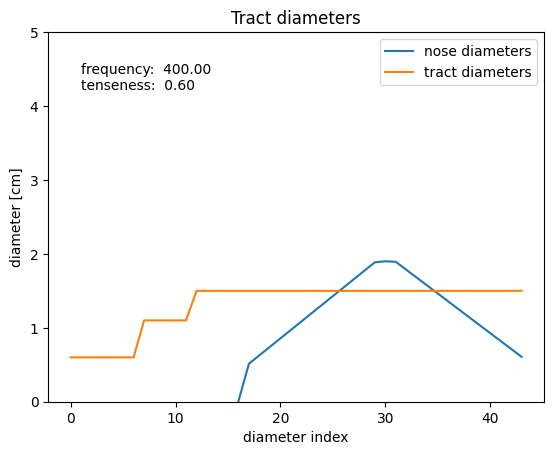

In [12]:
import glob

from pynktrombonegymnasium.environment import PynkTrombone
from stable_baselines3.common.env_util import make_vec_env
from sb3_plus import MultiOutputPPO

target_sound_files = glob.glob("./data/sample_target_sounds/*.wav")

# Instantiate the env
vec_env = make_vec_env(PynkTrombone, n_envs=1, env_kwargs=dict(target_sound_files=target_sound_files, render_mode="rgb_arrays"))
model = MultiOutputPPO.load("mimo_ppo_pynktrombone")


In [ ]:
obs = vec_env.reset()
rendered_outs = []
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    render_out = vec_env.render()
    rendered_outs.append(render_out)
    if dones[0]:
        break

In [15]:
vec_env.envs[0].env.sample_rate

44100

In [14]:
import numpy as np
import os
from typing import Callable

import soundfile
from pynktrombonegymnasium.spaces import ObservationSpaceNames as OSN
from pynktrombonegymnasium.wrappers import ActionByAcceleration, Log1pMelSpectrogram

output_dir = "submodules/PynkTromboneGymnasium/data/test_results_mimoppo_pynktrombone"
file_name = "generated_from_mimo_model3.wav"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
generated_waves = []
obs = vec_env.reset()
dones = [False]
while True:
    if dones[0]:
        break

    action, _states = model.predict(obs)
    print(action)
    obs, rewards, dones, info = vec_env.step(action)  # type: ignore
    generated_sound_wave = obs[OSN.GENERATED_SOUND_WAVE]

    generated_waves.append(generated_sound_wave[0])

generated_sound_wave = np.concatenate(generated_waves).astype(np.float32)

path = os.path.join(output_dir, file_name)
soundfile.write(path, generated_sound_wave, 44100)

[[-1.  1.  1. -1.  1.  1. -1. -1.]]
[[-1.         1.         1.        -1.         1.         1.
   0.2724411 -1.       ]]
[[-1.  1.  1. -1.  1.  1.  1. -1.]]
[[-1.         1.         1.        -1.         1.         1.
  -0.5433576 -1.       ]]
[[-1.  1.  1. -1.  1.  1.  1. -1.]]
[[-1.  1.  1. -1.  1.  1. -1. -1.]]
[[-1.  1.  1. -1.  1.  1. -1. -1.]]
[[-1.  1.  1. -1.  1.  1.  1. -1.]]
[[-1.          1.          1.         -1.          1.          1.
   0.57975996 -1.        ]]
[[-1.  1.  1. -1.  1.  1.  1. -1.]]
[[-1.  1.  1. -1.  1.  1.  1. -1.]]
[[-1.  1.  1. -1.  1.  1. -1. -1.]]
[[-1.  1.  1. -1.  1.  1. -1. -1.]]
[[-1.  1.  1. -1.  1.  1. -1. -1.]]
[[-1.          1.          1.         -1.          1.          1.
  -0.29672194 -1.        ]]
[[-1.  1.  1. -1.  1.  1.  1. -1.]]
[[-1.          1.          1.         -1.          1.          1.
   0.34185976 -1.        ]]
[[-1.  1.  1. -1.  1.  1.  1. -1.]]
[[-1.  1.  1. -1.  1.  1.  1. -1.]]
[[-1.  1.  1. -1.  1.  1. -1. -1.]]
[[-1

In [17]:
generated_sound_wave.shape

(216, 1024)

---------------------------------------------------------------------------------------------

In [ ]:

# import numpy as np
# def mean_squared_error(output: np.ndarray, target: np.ndarray) -> float:
#     """Compute mse.
#     Output and Target must have same shape.

#     Args:
#         output (ndarray): The output of model.
#         target (ndarray): Target of output

#     Returns:
#         mse (float): Mean Squared Error.
#     """
#     delta = output - target
#     if delta.ndim == 2:
#         delta = np.expand_dims(delta, axis=0)
#     print("output shape", output.shape)
#     print("target shape", target.shape)
#     print("delta shape", delta.shape)
#     mse = np.mean(delta * delta, axis=(1,2))
#     mse = np.round(mse, 5)
#     return mse

In [ ]:
# output = np.random.rand(513,5)
# target = np.random.rand(513,5)

# print(float(mean_squared_error(output, output)))

output shape (513, 5)
target shape (513, 5)
delta shape (1, 513, 5)
0.0


In [ ]:
# reward = -mean_squared_error(output, output)
# reward, isinstance(reward, float)

output shape (513, 5)
target shape (513, 5)
delta shape (1, 513, 5)


(array([-0.]), False)

In [ ]:
# batch_achieved_goals = np.array([output, output])
# batch_desired_goals = np.array([target, target])

# print(float(mean_squared_error(batch_achieved_goals, batch_desired_goals)[0]))

output shape (2, 513, 5)
target shape (2, 513, 5)
delta shape (2, 513, 5)
0.17441


In [ ]:
# from random import randint
# from numpy import inf, float32, array, int32, int64
# import gym
# from gym.wrappers import FlattenObservation
# from stable_baselines3 import A2C, DQN, PPO

# """Roulette environment class"""
# class Roulette_Environment(gym.Env):

#     metadata = {'render.modes': ['human', 'text']}

#     """Initialize the environment"""
#     def __init__(self):
#         super(Roulette_Environment, self).__init__()

#         # Some global variables
#         self.max_table_limit = 1000
#         self.initial_bankroll = 2000

#         # Spaces
#         # Each number on roulette board can have 0-1000 units placed on it
#         self.action_space = gym.spaces.Box(low=0, high=1000, shape=(37,))

#         # We're going to keep track of how many times each number shows up
#         # while we're playing, plus our current bankroll and the max
#         # table betting limit so the agent knows how much $ in total is allowed
#         # to be placed on the table. Going to use a Dict space for this.
#         self.observation_space = gym.spaces.Dict(
#             {
#                 "0": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "1": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "2": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "3": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "4": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "5": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "6": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "7": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "8": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "9": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "10": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "11": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "12": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "13": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "14": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "15": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "16": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "17": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "18": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "19": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "20": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "21": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "22": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "23": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "24": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "25": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "26": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "27": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "28": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "29": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "30": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "31": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "32": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "33": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "34": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "35": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#                 "36": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
                
#                 "current_bankroll": gym.spaces.Box(low=-inf, high=inf, shape=(1,), dtype=int),
                
#                 "max_table_limit": gym.spaces.Box(low=0, high=inf, shape=(1,), dtype=int),
#             }
#         )

#     """Reset the Environment"""
#     def reset(self):
#         self.current_bankroll = self.initial_bankroll
#         self.done = False

#         # Take a sample from the observation_space to modify the values of
#         self.current_state = self.observation_space.sample()
        
#         # Reset each number being tracked throughout gameplay to 0
#         for i in range(0, 37):
#             self.current_state[str(i)] = 0

#         # Reset our globals
#         self.current_state['current_bankroll'] = self.current_bankroll
#         self.current_state['max_table_limit'] = self.max_table_limit
        
#         return self.current_state


#     """Step Through the Environment"""
#     def step(self, action):
        
#         # Convert actions to ints cuz they show up as floats,
#         # even when defined as ints in the environment.
#         # https://github.com/openai/gym/issues/3107
#         for i in range(len(action)):
#             action[i] = int(action[i])
#         self.current_action = action
        
#         # Subtract your bets from bankroll
#         sum_of_bets = sum([bet for bet in self.current_action])

#         # Spin the wheel
#         self.current_number = randint(a=0, b=36)

#         # Calculate payout/reward
#         self.reward = 36 * self.current_action[self.current_number] - sum_of_bets

#         self.current_bankroll += self.reward

#         # Update the current state
#         self.current_state['current_bankroll'] = self.current_bankroll
#         self.current_state[str(self.current_number)] += 1

#         # If we've doubled our money, or lost our money
#         if self.current_bankroll >= self.initial_bankroll * 2 or self.current_bankroll <= 0:
#             self.done = True

#         print("Current state: ", self.current_state)

#         return self.current_state, self.reward, self.done, {}


#     """Render the Environment"""
#     def render(self, mode='text'):
#         # Text rendering
#         if mode == "text":
#             print(f'Bets Placed: {self.current_action}')
#             print(f'Number rolled: {self.current_number}')
#             print(f'Reward: {self.reward}')
#             print(f'New Bankroll: {self.current_bankroll}')

# env = Roulette_Environment()

# model = PPO('MultiInputPolicy', env, verbose=1)
# model.learn(total_timesteps=10)

# obs = env.reset()
# # obs = FlattenObservation(obs)

# for i in range(1000):
#     action, _state = model.predict(obs, deterministic=True)
#     # action, _state = model.predict(FlattenObservation(obs), deterministic=True)
#     obs, reward, done, info = env.step(action)
#     env.render()
#     if done:
#       obs = env.reset()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Current state:  OrderedDict([('0', 0), ('1', 0), ('10', 0), ('11', 0), ('12', 0), ('13', 0), ('14', 0), ('15', 0), ('16', 0), ('17', 0), ('18', 0), ('19', 0), ('2', 0), ('20', 0), ('21', 0), ('22', 0), ('23', 0), ('24', 0), ('25', 0), ('26', 0), ('27', 1), ('28', 0), ('29', 0), ('3', 0), ('30', 0), ('31', 0), ('32', 0), ('33', 0), ('34', 0), ('35', 0), ('36', 0), ('4', 0), ('5', 0), ('6', 0), ('7', 0), ('8', 0), ('9', 0), ('current_bankroll', 1993.0), ('max_table_limit', 1000)])
Current state:  OrderedDict([('0', 0), ('1', 0), ('10', 0), ('11', 0), ('12', 0), ('13', 0), ('14', 0), ('15', 0), ('16', 0), ('17', 0), ('18', 1), ('19', 0), ('2', 0), ('20', 0), ('21', 0), ('22', 0), ('23', 0), ('24', 0), ('25', 0), ('26', 0), ('27', 1), ('28', 0), ('29', 0), ('3', 0), ('30', 0), ('31', 0), ('32', 0), ('33', 0), ('34', 0), ('35', 0), ('36', 0), ('4', 0), ('5', 0), ('6', 0), ('7', 0), ('8', 0), ('9', 

/Users/ada/miniconda3/envs/rl_proj/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Current state:  OrderedDict([('0', 4), ('1', 2), ('10', 2), ('11', 3), ('12', 5), ('13', 2), ('14', 3), ('15', 4), ('16', 3), ('17', 5), ('18', 4), ('19', 2), ('2', 3), ('20', 2), ('21', 2), ('22', 0), ('23', 2), ('24', 5), ('25', 2), ('26', 3), ('27', 3), ('28', 3), ('29', 3), ('3', 2), ('30', 3), ('31', 3), ('32', 0), ('33', 3), ('34', 3), ('35', 3), ('36', 0), ('4', 2), ('5', 3), ('6', 2), ('7', 3), ('8', 2), ('9', 3), ('current_bankroll', 2193.0), ('max_table_limit', 1000)])
Current state:  OrderedDict([('0', 4), ('1', 2), ('10', 2), ('11', 3), ('12', 5), ('13', 2), ('14', 3), ('15', 4), ('16', 3), ('17', 5), ('18', 4), ('19', 3), ('2', 3), ('20', 2), ('21', 2), ('22', 0), ('23', 2), ('24', 5), ('25', 2), ('26', 3), ('27', 3), ('28', 3), ('29', 3), ('3', 2), ('30', 3), ('31', 3), ('32', 0), ('33', 3), ('34', 3), ('35', 3), ('36', 0), ('4', 2), ('5', 3), ('6', 2), ('7', 3), ('8', 2), ('9', 3), ('current_bankroll', 2186.0), ('max_table_limit', 1000)])
Current state:  OrderedDict([('0

ValueError: Error: Unexpected observation shape () for Box environment, please use (1,) or (n_env, 1) for the observation shape.